In [1]:
# The import statement performs two operations; it searches for the module whose name has been given then it links the result of this search to a name in the local scope
import pandas as pd
import numpy as np
# Using Skicit-learn to divide data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Importing the tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time
from subprocess import call
from IPython.display import Image
from sklearn import preprocessing
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from sklearn import metrics

# Classic analysis

In [2]:
#Pandas for data manipulation
#Read to read our data
#The head () function is used to get the first n rows. To quickly test if our object contains the right data type.
#Annee=Year;mois=month;jour=day;Temps d'arret=down time;temps prevu=time scheduled per team before the involvement of our process
features = pd.read_csv("C:/Users/Dell/Desktop/bablaa.csv")
features.head(5)

,Annee,mois,jour,Machine,Prob,Temps d'arret,temps prevu
0,2019,1,9,M3,P5,25,45
1,2019,1,9,M6,P7,15,0
2,2019,1,16,M9,P7,15,15
3,2019,1,26,M8,P8,10,15
4,2019,2,5,M8,P7,15,15


In [3]:
Total1= features["Temps d'arret"].sum()
Total2= features['temps prevu'].sum()
print("the total downtime is:",Total1,'\n'
      "the total time planned is:",Total2,'\n')

the total downtime is: 1200 
the total time planned is: 945 




A difference of 255=(1200-945) which represents more than 27% of the time expected by maintenance agents

In [4]:
#std: standard deviation
#mean: the average
#The describe () function is used to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the distribution of a data set.
# include = 'all' to add the qualitative variables in our statistical description.
#count: Represents the number of records in each column (variable) to be sure that we have all the data and all the boxes are full so as not to have NaNs
#unique: Reflects the number of new (unique) records (for categorical variables)
#top: Declare the records with the highest frequency (for qualitative variables)
#freq: Calculate the frequency of the recording presented by top. (for the qualitative variables)
feat=features.describe(include='all')
feat

,Annee,mois,jour,Machine,Prob,Temps d'arret,temps prevu
count,61.0,61.000000,61.000000,61,61,61.000000,61.000000
unique,NaN,NaN,NaN,9,9,NaN,NaN
top,NaN,NaN,NaN,M3,P7,NaN,NaN
freq,NaN,NaN,NaN,10,22,NaN,NaN
mean,2019.0,6.508197,15.491803,NaN,NaN,19.672131,15.491803
std,0.0,3.467097,6.960898,NaN,NaN,8.749707,13.124561
min,2019.0,1.000000,1.000000,NaN,NaN,10.000000,0.000000
25%,2019.0,3.000000,10.000000,NaN,NaN,15.000000,0.000000
50%,2019.0,6.000000,14.000000,NaN,NaN,15.000000,15.000000
75%,2019.0,10.000000,19.000000,NaN,NaN,25.000000,15.000000


Another problem (not only the difference between the times) which concerns the distribution for both types times

real time with 75% recordings which are around 25 min against the other (planned) around 15 min

In [5]:
#The shape function to get the dimensions of the DataFrame.
print(features.shape)
#The nunique () function is used to count distinct cases.
print(features.nunique())
#The loc () function is used to access a group of rows and columns.
print(feat.loc[['top', 'freq'],['Machine', 'Prob']])


(61, 7)
Annee             1
mois             12
jour             21
Machine           9
Prob              9
Temps d'arret     8
temps prevu       4
dtype: int64
     Machine Prob
top       M3   P7
freq      10   22


8 different groups for unscheduled times and 4 groups for scheduled (estimated) times by maintenance agents.

Machine M3 has the highest stop frequency

Problem P7 has the highest frequency of appearing among all types of problems

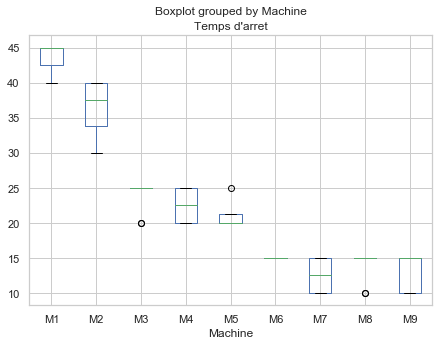

In [6]:
#The boxplot () function is used to create a chart from DataFrame columns.
#figsize: to adjust The size of the figure to be created.
boxplot = features.boxplot(column=["Temps d'arret"],by='Machine',figsize=(7,5))

The machine which has a high frequency of having problems is not necessarily the one which is the most critical since its stopping time is 25min while there are others which have a longer 45min

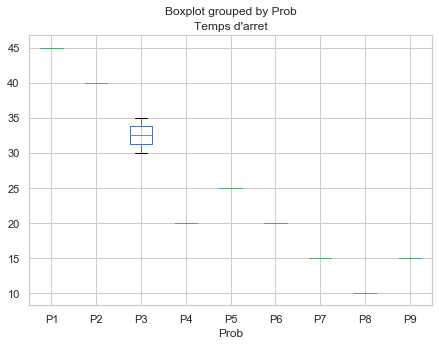

In [7]:
#by: A boxplot will be carried out by column value in by
boxplot = features.boxplot(column=["Temps d'arret"],by='Prob',figsize=(7,5))

The prob which has a high frequency is not necessarily the one which is the most critical because its stopping time is 15min while there are others which have a greater time of 45min

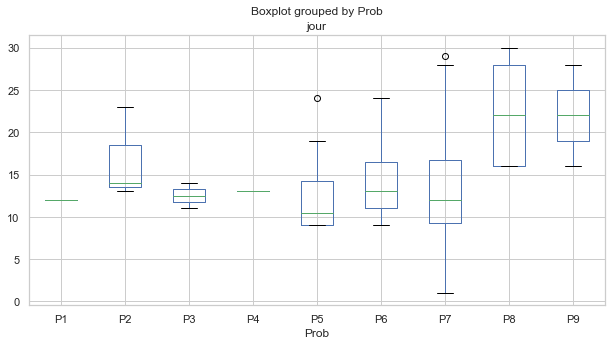

In [8]:
boxplot = features.boxplot(column=["jour"],by='Prob',figsize=(10,5))

This Boxplot will serve us, in the rest of our analysis, to identify the distribution of our problems compared to the days

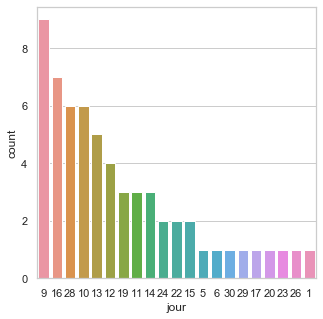

In [9]:
#set_style: Define the aesthetic style of the studs
#countplot: Show the number of cases in each categorical group using bars.
#show: is used to display all figures.
fig = plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(features["jour"],order=features["jour"].value_counts().index)
plt.show()

Focus our analyzes especially on the interval of days from 9 to 16, during each month, adding the day 28

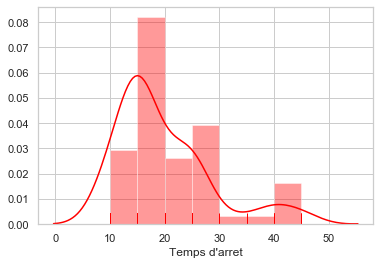

In [10]:
#displot: Flexibly plot a univariate distribution of observations
#distplot: allows you to plot the histogram of the values of a single variable
#trace the histogram and at the same time the density estimate (with a Gaussian kernel)
#bins by default the root of N so 7 in our example
ax1 = sns.distplot(features["Temps d'arret"],color = 'red',rug = True)

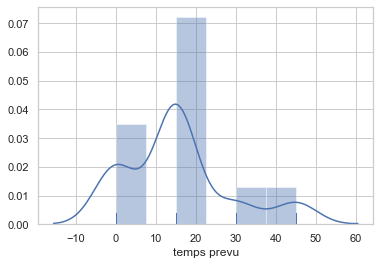

In [11]:
ax2 = sns.distplot(features["temps prevu"],rug = True)

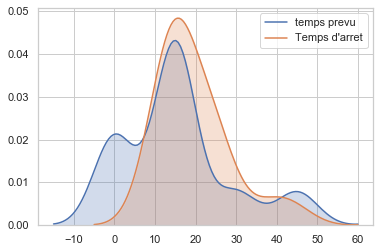

In [12]:
#compare 2 distributions by plotting density functions
sns.kdeplot(features["temps prevu"],shade = True, label = "temps prevu",bw = 5)
sns.kdeplot(features["Temps d'arret"], shade = True,label = "Temps d'arret",bw = 5)

This comparison, between the two distributions, allows us to validate our first hypothesis concerning the distribution of 75%.

the graphs have the same median around 15min, but not the same distribution

This is what can also justify the difference between the two times and what requires changing the forecasts so that they are more precise and more reliable

In [13]:
#groupby: to group large amounts of data and calculate operations on these groups.
#The drop () function is used to remove the specified labels from rows or columns.
#sort_values: Sort a series in ascending or descending order according to a condition.
featjour=features.groupby(['jour']).sum()
featjour=featjour.drop(['Annee','mois'],axis=1)
featjour = featjour.sort_values(by="Temps d'arret", ascending=False)
featjour.style.background_gradient(cmap='Reds')

,Temps d'arret,temps prevu
jour,,
9,190,270
12,135,30
13,115,45
10,105,60
14,95,30
16,90,105
28,80,180
11,75,30
19,50,15


This table confirms the interval of days on which we must focus more during our analysis.


And according to the Boxplot which shows the distribution of our problems compared to the days, we can focus more on the problem P5 Firstly. Then P1 / P2 / P3 / P4 / P6

In [14]:
#groupby: to group large amounts of data and calculate operations on these groups.
#The drop () function is used to remove the specified labels from rows or columns.
#sort_values: Sort a series in ascending or descending order according to a condition.
#background_gradient: to create a color gradient mapping on a specified column.
featMach=features.groupby(['Machine']).sum()
featMach=featMach.drop(['Annee','mois','jour'],axis=1)
featMach = featMach.sort_values(by="Temps d'arret", ascending=False)
featMach.style.background_gradient(cmap='Reds')

,Temps d'arret,temps prevu
Machine,,
M3,240,315
M2,145,60
M4,135,60
M1,130,45
M8,125,105
M6,120,30
M9,120,120
M7,100,195
M5,85,15


Machines(M2/M4/M1) have a downtime of over 130min while their scheduled time is just 60min.


Hypothesis: Maybe this Machines are the cause of these shifts and which are also among the important variables of our problematic.

In [15]:
featProb=features.groupby(['Prob']).sum()
featProb=featProb.drop(['Annee','mois','jour'],axis=1)
featProb = featProb.sort_values(by="Temps d'arret", ascending=False)
featProb.style.background_gradient(cmap='Reds')

,Temps d'arret,temps prevu
Prob,,
P7,330,240
P5,300,285
P6,140,90
P2,120,45
P1,90,30
P8,90,150
P3,65,30
P9,45,60
P4,20,15


Initial validation of major problems

For the frequency: P5 is a problem of matter which affects the M3 / M4 machine

For criticality: P1 and P2 are breakdowns of M1 and M2 machines

From a meeting with the maintenance and purchasing department it was concluded that these results are logical since the company
In most cases receives its raw materials (glues) between the 8th and the 9th during each month and these glues cause problems at the start of each use (unsuitable mixing rate, pressure or temperature)
What will make us focus more on forecasting their times
# This is what further justifies the usefulness of our choice of this kind of problems in relation to the company

<font color='green'>One-Hot Encoding</font> (Data preparation)

In [16]:
#The get_dummies () function is used to convert a categorical variable to indicator variables (One-Hot Encoding)
features1 = features.drop(['Annee','temps prevu'],axis=1)
features1 = pd.get_dummies(features1)
features1.iloc[:,:].head(5)
#Data after One-Hot Encoding

,mois,jour,Temps d'arret,Machine_M1,Machine_M2,Machine_M3,Machine_M4,Machine_M5,Machine_M6,Machine_M7,...,Machine_M9,Prob_P1,Prob_P2,Prob_P3,Prob_P4,Prob_P5,Prob_P6,Prob_P7,Prob_P8,Prob_P9
0,1,9,25,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,9,15,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,16,15,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,26,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,5,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
#The corr () function is used to calculate the pairwise correlation of columns
mat=features1.corr()
mat

,mois,jour,Temps d'arret,Machine_M1,Machine_M2,Machine_M3,Machine_M4,Machine_M5,Machine_M6,Machine_M7,...,Machine_M9,Prob_P1,Prob_P2,Prob_P3,Prob_P4,Prob_P5,Prob_P6,Prob_P7,Prob_P8,Prob_P9
mois,1.000000,0.110324,0.162163,0.032528,0.114928,-0.026811,0.159303,-0.039151,-0.170407,0.055568,...,-0.101815,0.053105,0.098669,0.026333,-0.131714,-0.001180,0.141244,-0.081218,-0.155588,0.142763
jour,0.110324,1.000000,-0.260009,0.005761,-0.095616,-0.326596,0.048235,-0.009279,-0.323132,0.598405,...,0.030625,-0.093124,0.038704,-0.079790,-0.046597,-0.214462,-0.055450,-0.127682,0.412284,0.214403
Temps d'arret,0.162163,-0.260009,1.000000,0.620125,0.506078,0.220844,0.107634,0.048168,-0.209179,-0.321108,...,-0.303894,0.537382,0.532763,0.272169,0.004878,0.303838,0.013603,-0.404380,-0.463700,-0.122450
Machine_M1,0.032528,0.005761,0.620125,1.000000,-0.060248,-0.100707,-0.075117,-0.060248,-0.088360,-0.088360,...,-0.094616,0.809548,0.298851,-0.041873,-0.029361,-0.112548,-0.081884,-0.170815,-0.094616,-0.051724
Machine_M2,0.114928,-0.095616,0.506078,-0.060248,1.000000,-0.117303,-0.087496,-0.070175,-0.102920,-0.102920,...,-0.110208,-0.048773,0.552269,0.695019,-0.034199,-0.131095,-0.095377,-0.198963,-0.110208,-0.060248
Machine_M3,-0.026811,-0.326596,0.220844,-0.100707,-0.117303,1.000000,-0.146254,-0.117303,-0.172037,-0.172037,...,-0.184219,-0.081527,-0.100707,-0.081527,-0.057166,0.672007,0.118433,-0.332578,-0.184219,-0.100707
Machine_M4,0.159303,0.048235,0.107634,-0.075117,-0.087496,-0.146254,1.000000,-0.087496,-0.128322,-0.128322,...,-0.137409,-0.060811,-0.075117,-0.060811,-0.042640,0.251987,0.399224,-0.248069,-0.137409,-0.075117
Machine_M5,-0.039151,-0.009279,0.048168,-0.060248,-0.070175,-0.117303,-0.087496,1.000000,-0.102920,-0.102920,...,-0.110208,-0.048773,-0.060248,-0.048773,0.487340,0.035505,0.320195,-0.198963,-0.110208,-0.060248
Machine_M6,-0.170407,-0.323132,-0.209179,-0.088360,-0.102920,-0.172037,-0.128322,-0.102920,1.000000,-0.150943,...,-0.161632,-0.071531,-0.088360,-0.071531,-0.050157,-0.192265,-0.139881,0.517283,-0.161632,-0.088360
Machine_M7,0.055568,0.598405,-0.321108,-0.088360,-0.102920,-0.172037,-0.128322,-0.102920,-0.150943,1.000000,...,-0.161632,-0.071531,-0.088360,-0.071531,-0.050157,-0.192265,-0.139881,0.011606,0.386120,0.136221


Text(0.5, 1, 'Correlation between different fearures')

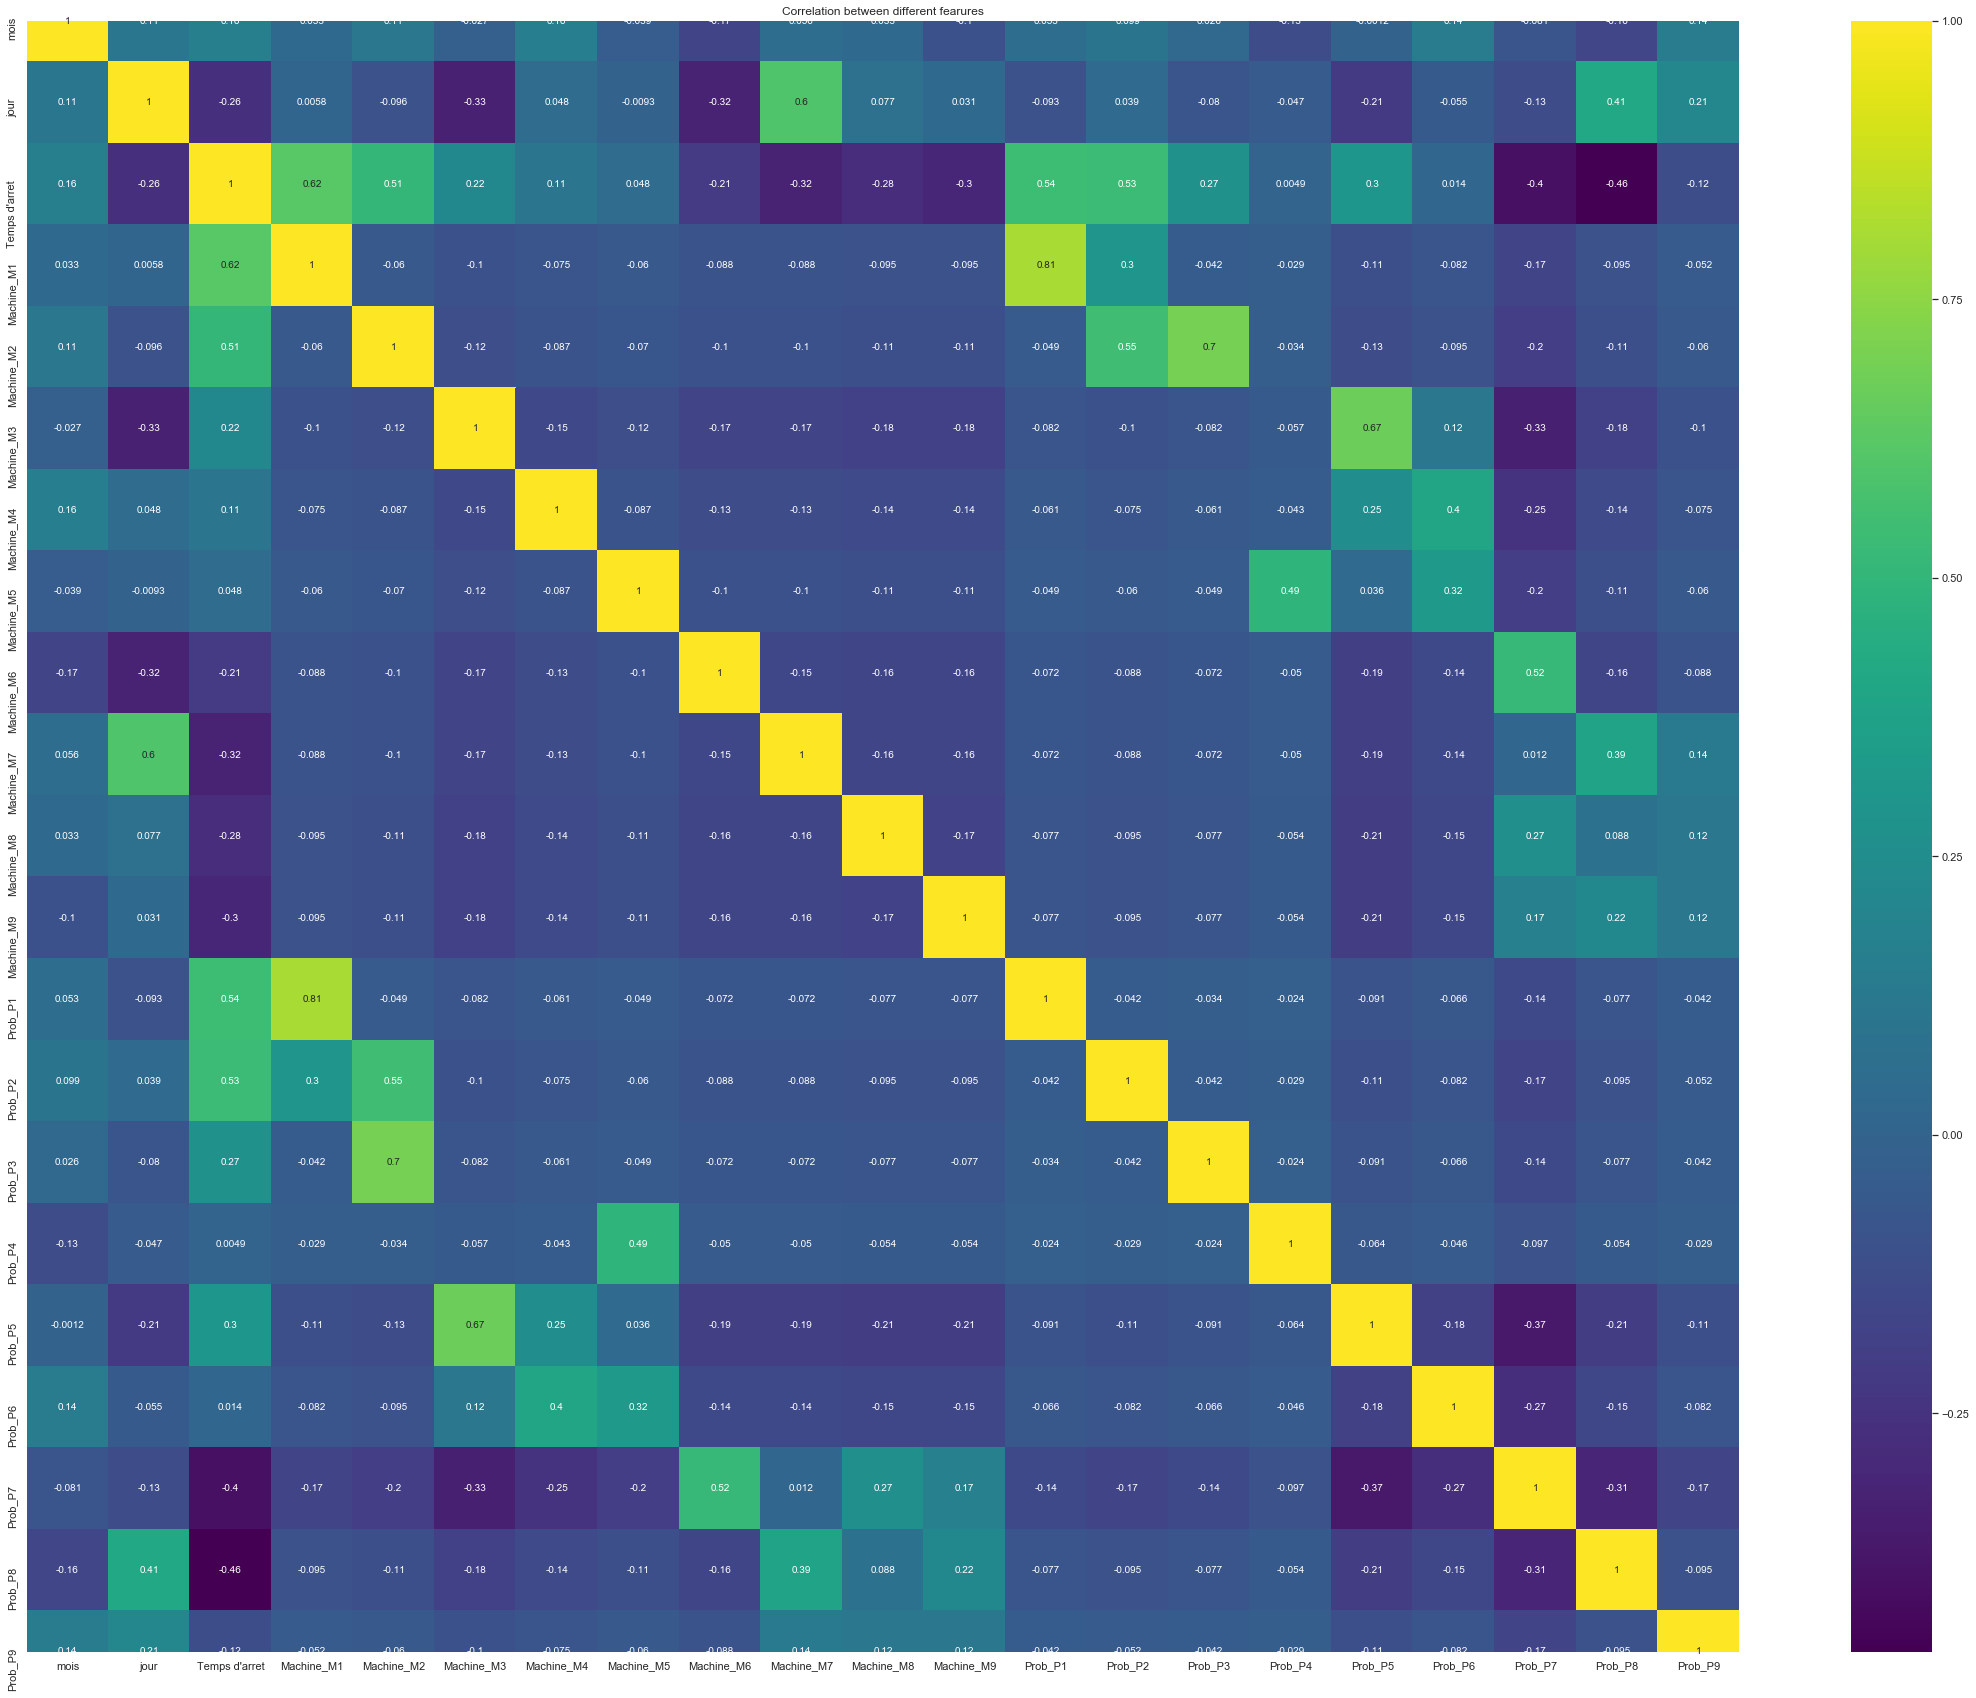

In [18]:
#heatmap: Plot rectangular data as a color coded matrix.
plt.figure(figsize=(40,30))
sns.heatmap(features1.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')

The highest correlations:


corr (M1, P1) = 0.81


corr (M1, downtime) = 0.62


corr (M2, P3) = 0.7


corr (M2, stop time) = 0.51

So we can conclude that 

M1 machine dowtimes are related to P1 failures and not a material problem, which requires immediate repair for M1.

the shutdown of the M2 machine is related to the quality of the raw material and not the breakdowns therefore M2 is in a good condition.


corr(M3,P5)=0,7
So for M3 machine shutdowns, we find the first problem is P5 which is a material problem and this shows that our first validation is correct. 

# K-MEANS

In [19]:
x = features1.iloc[:,[1,2]].values

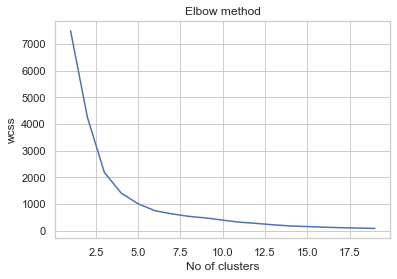

In [20]:
from sklearn.cluster import KMeans
wcss =[]
distances = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans = KMeans(n_clusters = i).fit(x)
    wcss.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 20), wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In the graph above, convergence is achieved and the elbow shape occurs when K is equal to 5!


So we will continue our algorithm with a K equal to 5 in order to have the best results

[3 1 0 4 1 3 1 0 4 3 1 3 3 3 0 4 3 1 0 1 3 1 0 4 1 2 3 2 3 0 0 2 4 4 3 1 0
 4 3 1 0 4 2 3 4 3 1 0 4 3 2 3 0 4 2 3 1 0 0 3 0]


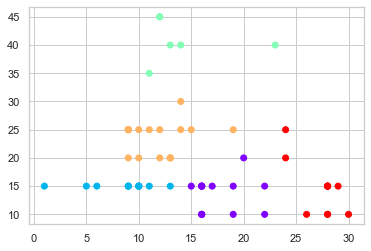

In [21]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_
plt.scatter(x[:,0],x[:,1],c=y_kmeans5,cmap="rainbow")

So we have 5 groups and each one gathers the data which have the same characteristics

The next step is to look for the characteristics of each centroid in order to have more precise characteristics about these groups in order to estimate the average stopping times in each interval of days

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

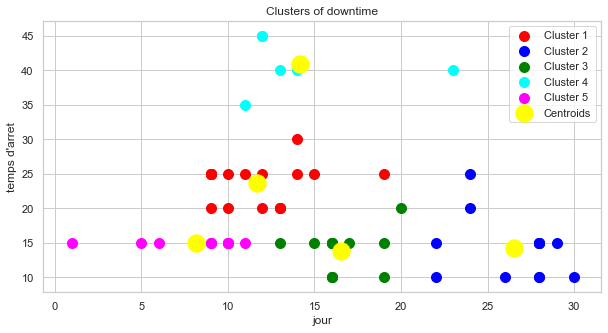

In [23]:
fig = plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of downtime')
plt.xlabel('jour')
plt.ylabel("temps d'arret")
plt.legend()
plt.show()

In [24]:
pred = kmeans.predict(x)
frame = pd.DataFrame(x)
frame['cluster'] = pred
frame['cluster'].value_counts()
#indice 0 == cluster 1
#indice 1 == cluster 2
#indice 2 == cluster 3
#indice 3 == cluster 4
#indice 4 == cluster 5

0    18
2    13
1    13
4    11
3     6
Name: cluster, dtype: int64

From day 9 to 20: 4 clusters with a downtime of 23,75 min = (40+25+15+15)/4 per day as arithmetic mean.
But to be more precise we can use the weighted average


(Sum(number of observations j from day 9 to 20 (in the cluster(i))*downtime of centroide(i))/totam number of observations between day 9 and20)

with an estimated downtime of 22,4 min =(3x15+12x24+4x40+8x14)/(3+12+4+8) per day 

For the other days: we can just work with a time of 15 min per day

# Random forest

Data preparation : 
One-Hot Encoding/
Features and Targets/Convert Data to Arrays

In [25]:
features = pd.read_csv("C:/Users/Dell/Desktop/bablaa.csv")
features.head(5)

,Annee,mois,jour,Machine,Prob,Temps d'arret,temps prevu
0,2019,1,9,M3,P5,25,45
1,2019,1,9,M6,P7,15,0
2,2019,1,16,M9,P7,15,15
3,2019,1,26,M8,P8,10,15
4,2019,2,5,M8,P7,15,15


In [26]:
features = pd.get_dummies(features)
features.iloc[:,5:].head(5)

,Machine_M1,Machine_M2,Machine_M3,Machine_M4,Machine_M5,Machine_M6,Machine_M7,Machine_M8,Machine_M9,Prob_P1,Prob_P2,Prob_P3,Prob_P4,Prob_P5,Prob_P6,Prob_P7,Prob_P8,Prob_P9
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [27]:
# Use numpy to convert data to arrays
# Labels: Labels are the values which we want to predict
labels = np.array(features["Temps d'arret"])
features= features.drop("Temps d'arret", axis = 1)
# Save feature names for a later use
features_list = list(features.columns)
features= np.array(features)

In [28]:
# Divide data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [29]:
#We can look at the shape of all the data to make sure we did everything right
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (45, 22)
Training Labels Shape: (45,)
Testing Features Shape: (16, 22)
Testing Labels Shape: (16,)


Establish a Baseline:
If our model cannot improve the baseline, it will fail and we should try a different model or admit that machine learning is not suitable for our problem.

In [30]:
# Before we can make and evaluate any predictions, we need to establish a baseline, a reasonable metric that we hope to beat with our model. If our model cannot improve the baseline, it will fail and we should try a different model or admit that machine learning is not suitable for our problem
#Base forecasts are historical days
baseline_preds = test_features[:, features_list.index("temps prevu")]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  13.44


We now have our goal! If we can't beat an average error of 13 min, we have to rethink our approach.


Train the model. We import the random forest regression model from skicit-learn, instantiate the model and fit the model to the training data.

In [31]:
#Instacier (designate the starting of a program) the model by 1000 decision trees
#Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

Make predictions on the test set

In [32]:
# Use the forest prediction method on the test data
# Calculate absolute errors
# Print out the mean absolute error (mae)
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2),)

Mean Absolute Error: 0.96


In [33]:
# measurement of the quality of the prediction by the coefficient of determination R2 (a linear regression)
#R2=1-[(Yi-Y^)^2/(Yi-Ymoy)^2
from sklearn.metrics import r2_score
r2_score(predictions, test_labels)

0.8098764900303216

Our average estimate is down 1min. That's more of an average 12 min improvement from baseline. It seems significant, it is close to <font color='red'>92%</font> ((13-1)/13) much better than the baseline, which could represent millions of cents for the company (less unplanned downtime, respect of the production schedule).



In [34]:
# Calculate the absolute mean error in percentage (MAPE)
# Calculate and display precision
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Accuracy: 97.094 %.


Our model has learned to predict the next day's downtime with 97% accuracy.

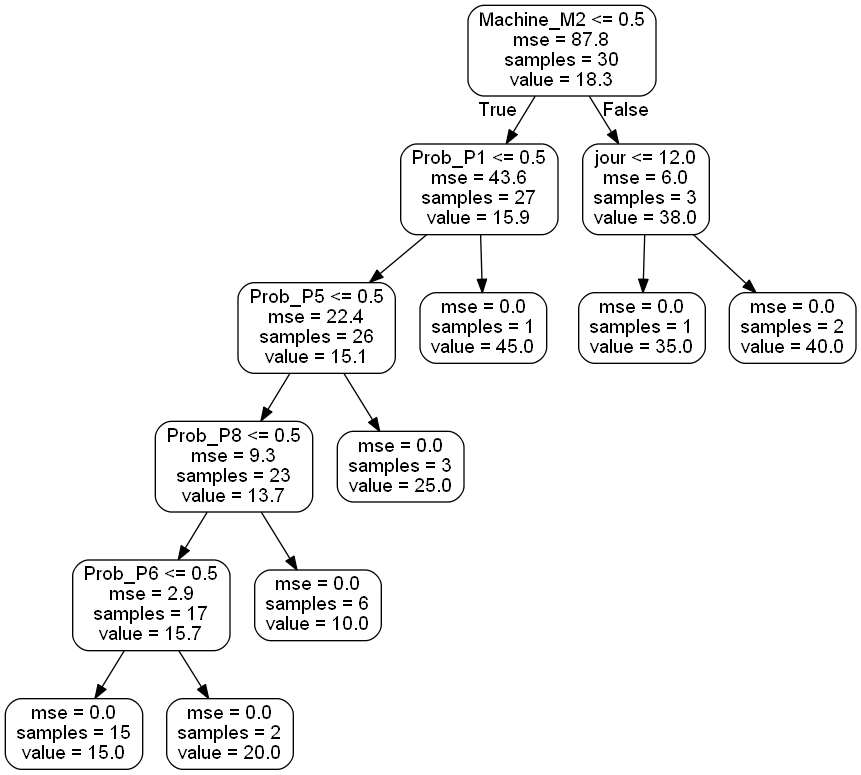

In [35]:
# Take a tree out of the forest
# Export the image to a dot file (dot file
# Use a point file to create a graph)
# Draw a graphic in a png file
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = features_list, rounded = True, precision = 1)
pydot.graph_from_dot_file('tree.dot')
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image(filename = 'tree.png')

Let's take an example of a prediction for January 09, 2020
According to the boxplot the stopping time of day 9 in relation to M3 / M6 / M8 and Prob5 / 7 with a dispersion of stopping time between 15 and 25min
We start at the root node and the first answer is true because the probability that the mahine M1 falls ≤ 0.5
Then the second is true because the proba of prob P1 ≤0.5
AND the third one is false because the prob of the prob P5 ≥0.5 therefore we foresee a stop time of 25min


In [36]:
rf.predict([[2020,1,9,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,25]])

array([32.565])

the important variables:

In order to quantify the usefulness of all the variables throughout the random forest, we can examine the relative importance of the variables. The importance returned in Skicit-learn represents how much the inclusion of a particular variable improves the prediction

In [37]:
#Get important variables
# List of tuples with variable and importance
#Sort important variables by most important first
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Machine_M2           Importance: 0.28
Variable: Machine_M1           Importance: 0.18
Variable: Prob_P1              Importance: 0.18
Variable: Prob_P5              Importance: 0.14
Variable: Prob_P8              Importance: 0.07
Variable: Prob_P2              Importance: 0.06
Variable: jour                 Importance: 0.02
Variable: Prob_P6              Importance: 0.02
Variable: Prob_P7              Importance: 0.02
Variable: Prob_P3              Importance: 0.01
Variable: Annee                Importance: 0.0
Variable: mois                 Importance: 0.0
Variable: temps prevu          Importance: 0.0
Variable: Machine_M3           Importance: 0.0
Variable: Machine_M4           Importance: 0.0
Variable: Machine_M5           Importance: 0.0
Variable: Machine_M6           Importance: 0.0
Variable: Machine_M7           Importance: 0.0
Variable: Machine_M8           Importance: 0.0
Variable: Machine_M9           Importance: 0.0
Variable: Prob_P4              Importance: 0.0
Var

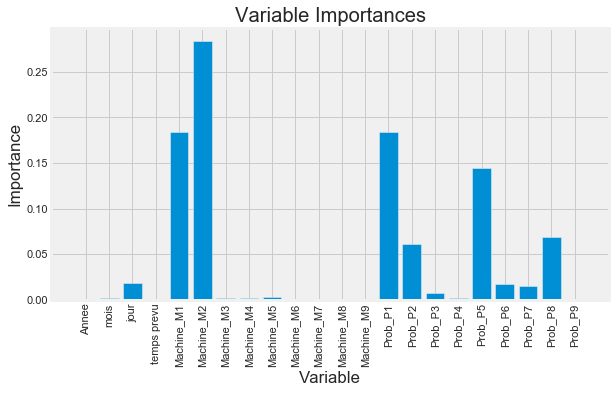

In [38]:
fig = plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, features_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In future implementations of the model, we may remove the variables that are unimportant and performance will not suffer. Let's quickly make a random forest with only the 6 most important variables

In [39]:
# New random forest with only the 6 most important variables
# Extract the 6 most important features
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [features_list.index('jour'),features_list.index('Machine_M2'),features_list.index('Machine_M1'),features_list.index('Prob_P1'),features_list.index('Prob_P5'),features_list.index('Prob_P8'),features_list.index('Prob_P2')]

print(
"indice J est",features_list.index('jour'),'\n'    
"indice M2 est",features_list.index('Machine_M2'),'\n'
"indice M1 est",features_list.index('Machine_M1'),'\n'
"indice P1 est",features_list.index('Prob_P1'),'\n'
"indice P5 est",features_list.index('Prob_P5'),'\n'
"indice P8 est",features_list.index('Prob_P8'),'\n'
"indice P2 est",features_list.index('Prob_P2'))

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'min.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

indice J est 2 
indice M2 est 5 
indice M1 est 4 
indice P1 est 13 
indice P5 est 17 
indice P8 est 20 
indice P2 est 14
Mean Absolute Error: 1.6 min.
Accuracy: 94.03 %.


This tells us that we actually don't need all of the data we have collected to make accurate predictions! If we were to continue using this template, we would only be able to collect the 6 variables and achieve good performance. 

We can be confident that our model can predict tomorrow's downtime with 94% accuracy from one year of historical data.


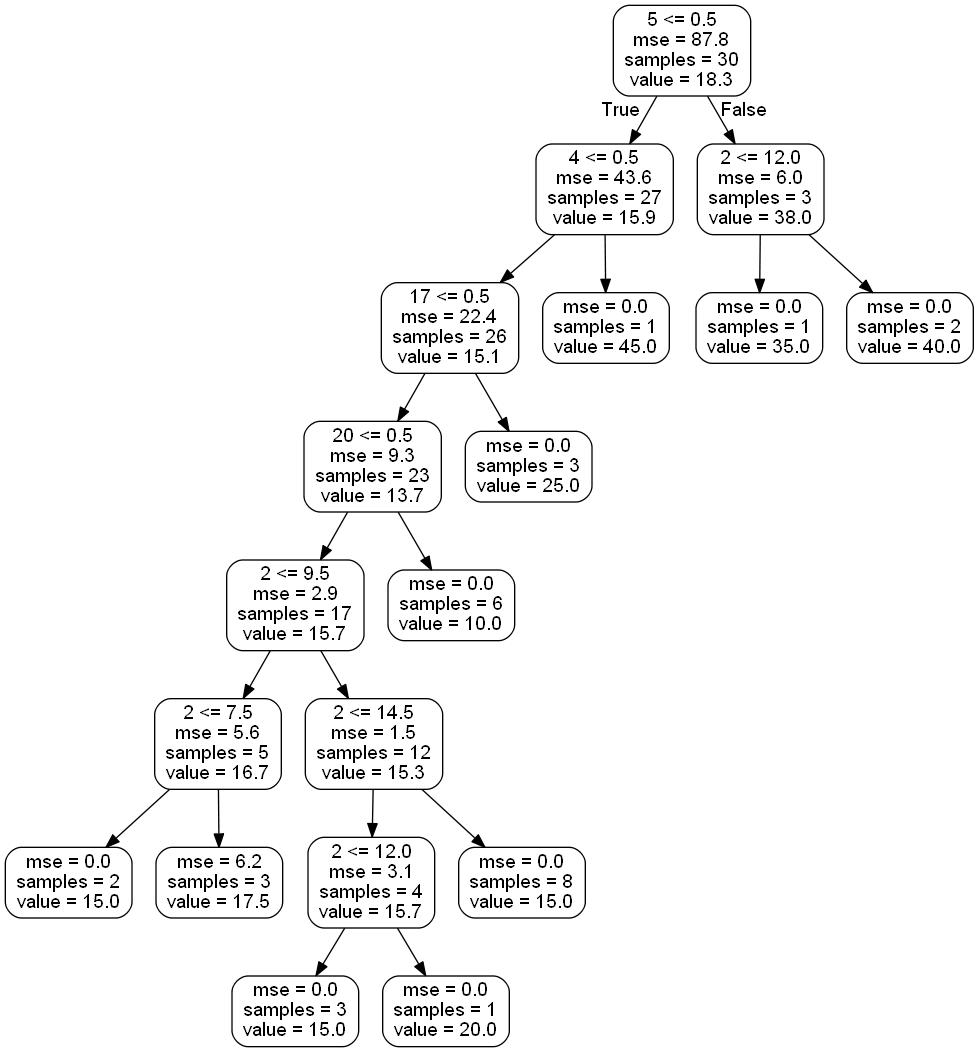

In [40]:
tree = rf_most_important.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = important_indices, rounded = True, precision = 1)
pydot.graph_from_dot_file('tree.dot')
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image(filename = 'tree.png')
#2   == J
#5  == M2  
#4  == M1
#13 == P1
#17 == P5
#20 == P8
#14 == P2


# take a look on our web application to have fast and direct results 